<a href="https://colab.research.google.com/github/Shradha-12/AI-ML-Month/blob/main/major_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import datetime as dt
import io
import matplotlib.pyplot as plt
% matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

In [ ]:
# uploading dataset
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [ ]:
# sample of 1st 5 rows of dataset
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


In [ ]:
# no of rows and coloumns
df.shape

(1470, 35)

In [ ]:


# determining data type 
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:

# how many null values in a coloumn
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:


df.isnull().values.any()

False

In [ ]:
# mathematical info of dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:

# no of people left
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


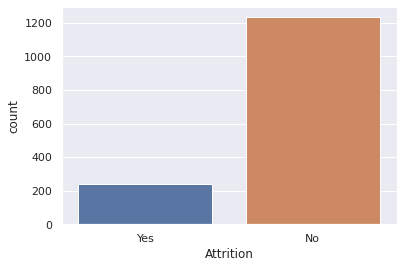

In [ ]:

# graph of attrition
sns.countplot(df['Attrition'])

In [ ]:

# grouping each coloumn on basis of attrition
left_count=df.groupby('Attrition').count()
print(left_count)

            Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
Attrition                                                                  
No         1233            1233       1233        1233              1233   
Yes         237             237        237         237               237   

           Education  EducationField  EmployeeCount  EmployeeNumber  \
Attrition                                                             
No              1233            1233           1233            1233   
Yes              237             237            237             237   

           EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
Attrition                                                                
No                            1233    1233        1233            1233   
Yes                            237     237         237             237   

           JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
Attrition                         

In [ ]:



# here we can guess about this percent accurately
(1233-273)/1233

0.7785888077858881

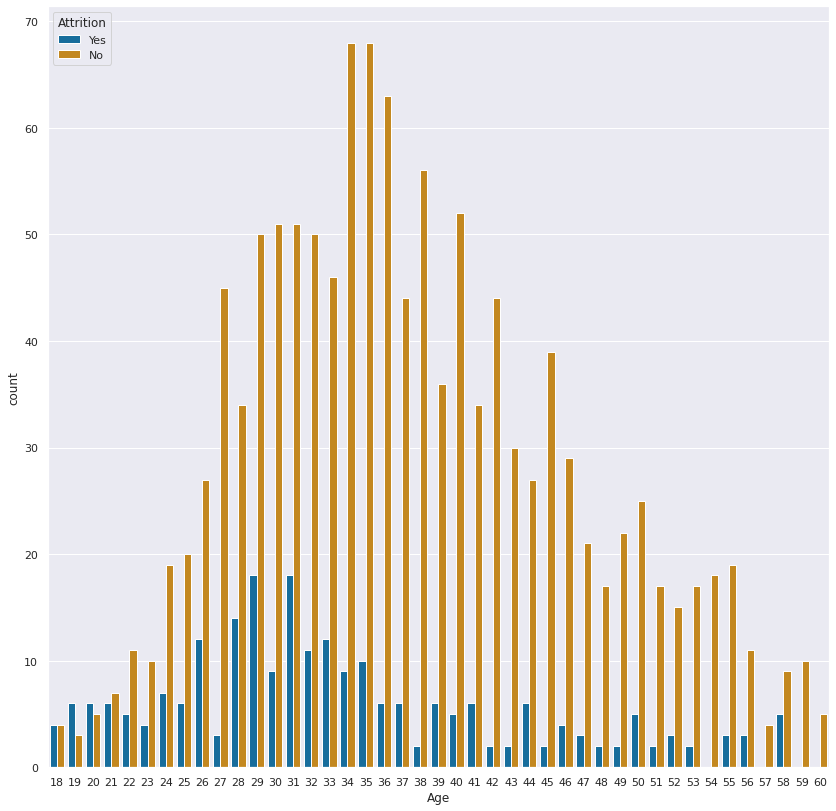

In [ ]:

# age affecting attrition
plt.subplots(figsize=(14,14))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

In [ ]:
 # Years With Current Manager affecting attrition
 Z=df.groupby(["YearsWithCurrManager","Attrition"])["Attrition"].count()
print(Z)

YearsWithCurrManager  Attrition
0                     No           178
                      Yes           85
1                     No            65
                      Yes           11
2                     No           294
                      Yes           50
3                     No           123
                      Yes           19
4                     No            87
                      Yes           11
5                     No            27
                      Yes            4
6                     No            25
                      Yes            4
7                     No           185
                      Yes           31
8                     No            97
                      Yes           10
9                     No            58
                      Yes            6
10                    No            24
                      Yes            3
11                    No            21
                      Yes            1
12                    No        

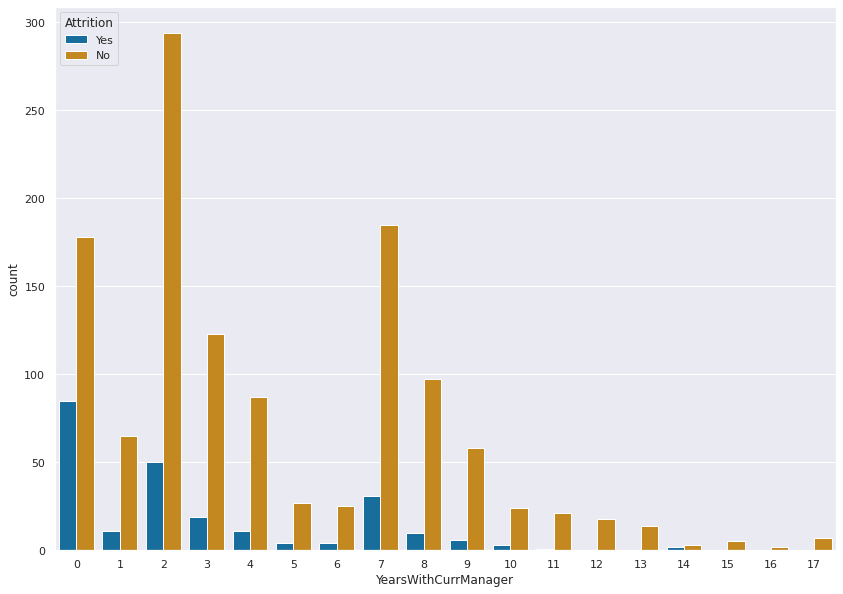

In [ ]:
# graph 
plt.subplots(figsize=(14,10))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df, palette='colorblind')

In [ ]:
 # Department affecting attrition
 Z=df.groupby(["Department","Attrition"])["Attrition"].count()
print(Z)

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64


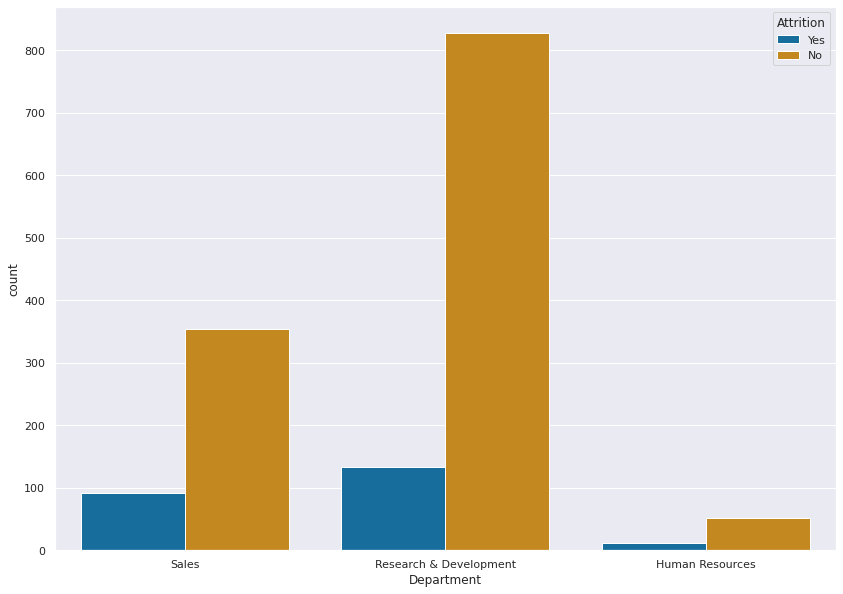

In [ ]:
# graph
plt.subplots(figsize=(14,10))
sns.countplot(x='Department', hue='Attrition', data=df, palette='colorblind')

In [ ]:
 # gender affecting attrition
 Z=df.groupby(["Gender","Attrition"])["Attrition"].count()
print(Z)

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


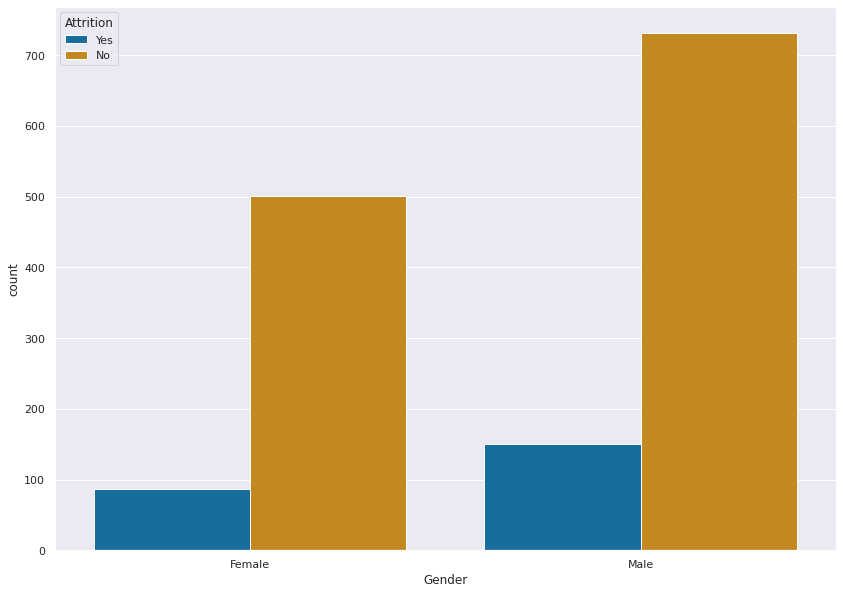

In [ ]:
# graph
plt.subplots(figsize=(14,10))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='colorblind')

In [ ]:
 # Years Since Last Promotion affecting attrition
 Z=df.groupby(["YearsSinceLastPromotion","Attrition"])["Attrition"].count()
print(Z)

YearsSinceLastPromotion  Attrition
0                        No           471
                         Yes          110
1                        No           308
                         Yes           49
2                        No           132
                         Yes           27
3                        No            43
                         Yes            9
4                        No            56
                         Yes            5
5                        No            43
                         Yes            2
6                        No            26
                         Yes            6
7                        No            60
                         Yes           16
8                        No            18
9                        No            13
                         Yes            4
10                       No             5
                         Yes            1
11                       No            22
                         Yes            2

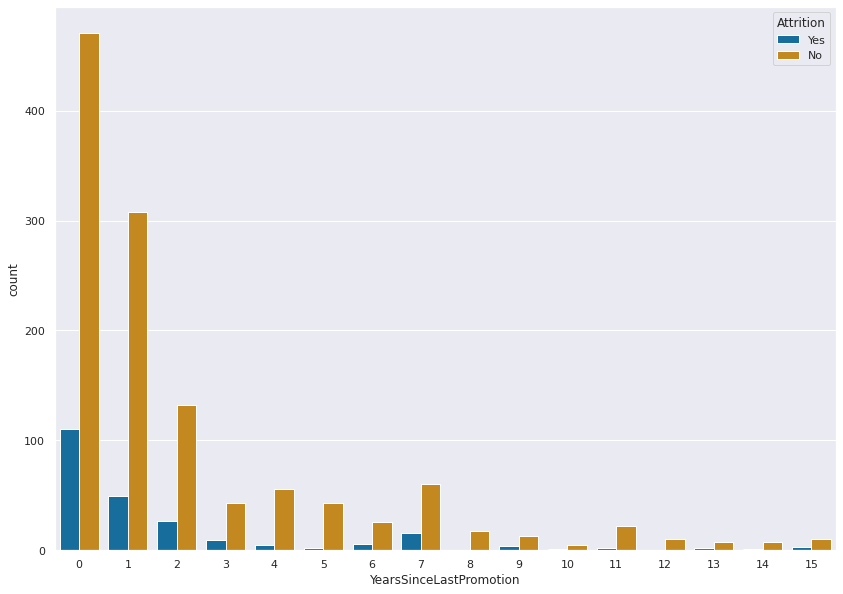

In [ ]:
# graph
plt.subplots(figsize=(14,10))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='colorblind')

In [ ]:
# Years In Current Role affecting attrition
Z=df.groupby(["YearsInCurrentRole","Attrition"])["Attrition"].count()
print(Z)

YearsInCurrentRole  Attrition
0                   No           171
                    Yes           73
1                   No            46
                    Yes           11
2                   No           304
                    Yes           68
3                   No           119
                    Yes           16
4                   No            89
                    Yes           15
5                   No            35
                    Yes            1
6                   No            35
                    Yes            2
7                   No           191
                    Yes           31
8                   No            82
                    Yes            7
9                   No            61
                    Yes            6
10                  No            27
                    Yes            2
11                  No            22
12                  No             9
                    Yes            1
13                  No            13
        

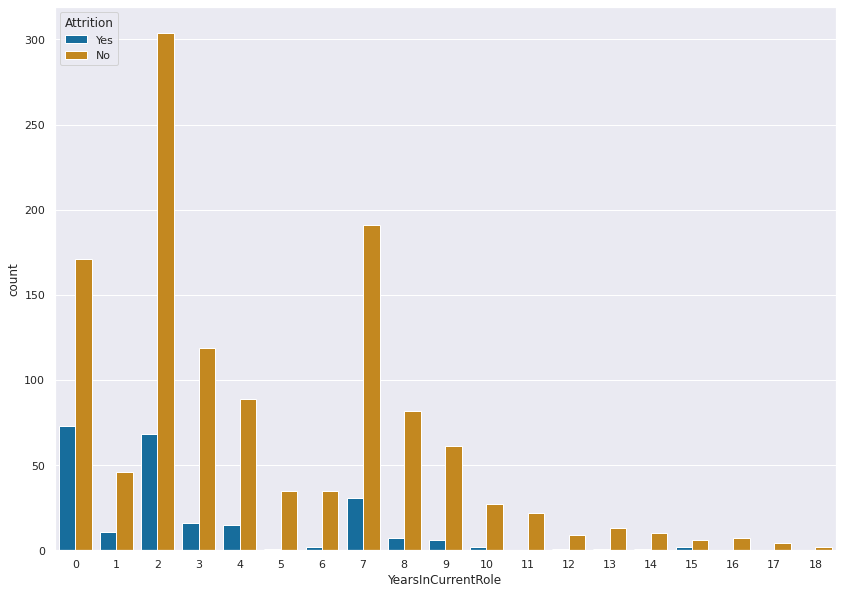

In [ ]:
# graph
plt.subplots(figsize=(14,10))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='colorblind')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


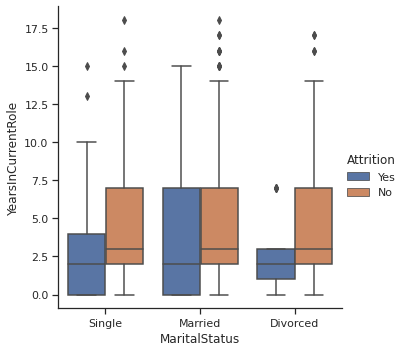

In [ ]:
# boxplot 
with sns.axes_style(style='ticks'):
 g = sns.catplot("MaritalStatus", "YearsInCurrentRole", "Attrition", data=df, kind="box")

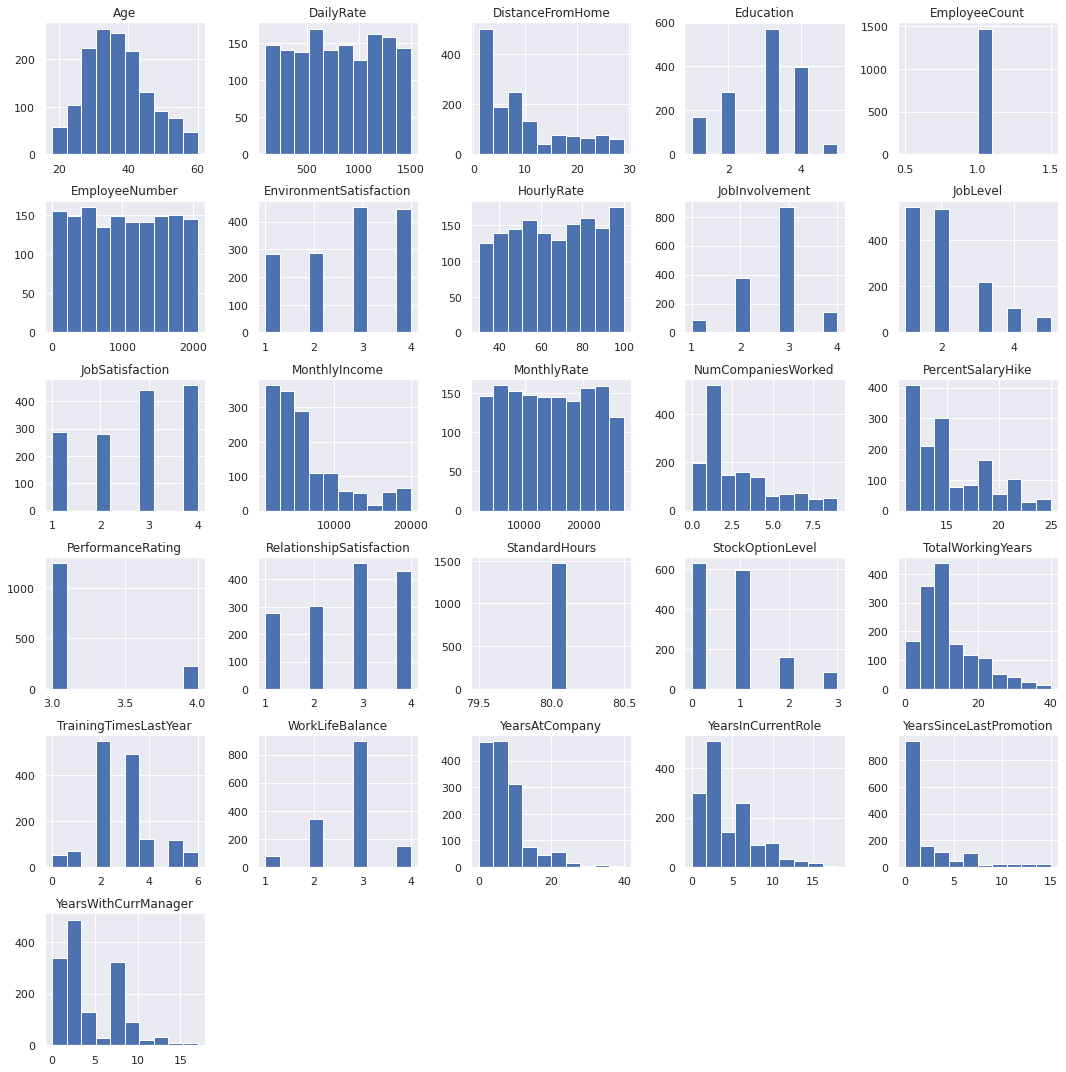

In [ ]:
# histograms on various factors affecting attrition 
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

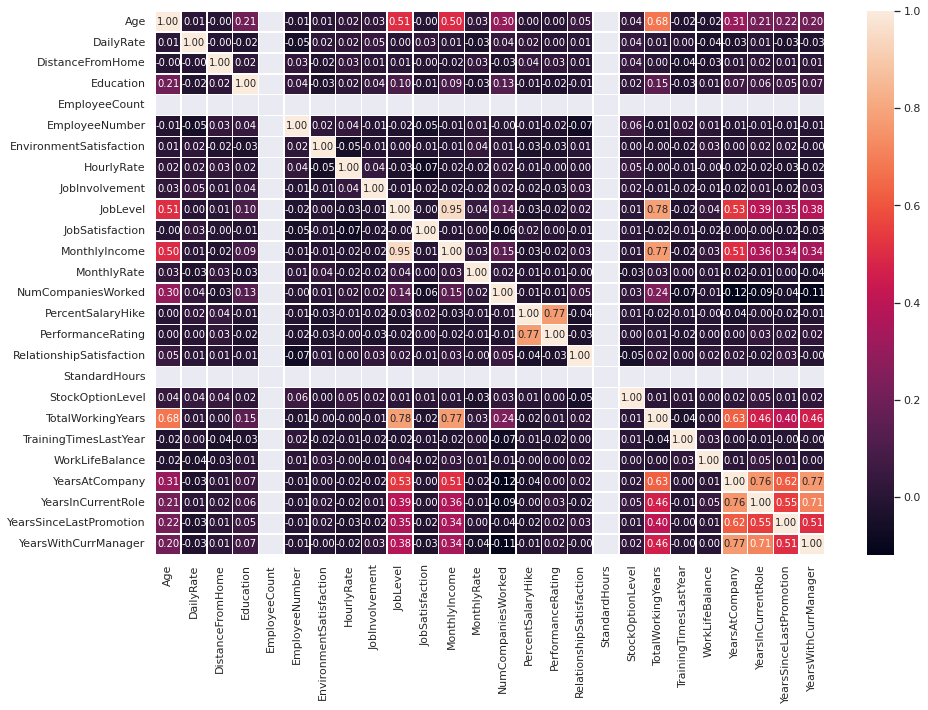

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

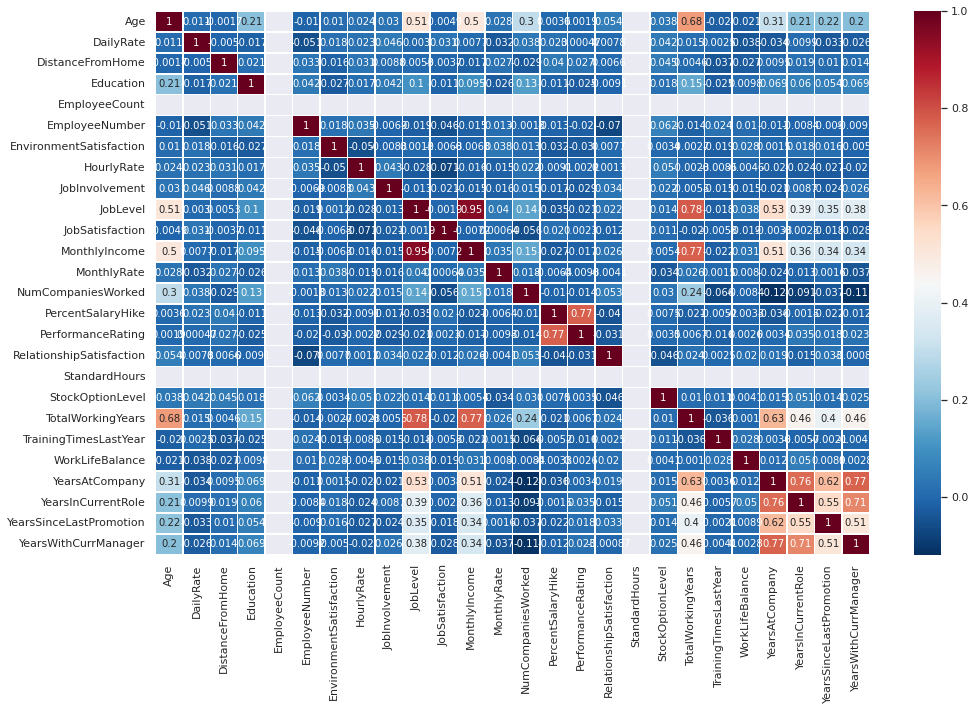

In [ ]:
pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
df=df.drop("EmployeeCount",axis=1)
df=df.drop("StandardHours",axis=1)
df=df.drop("Over18",axis=1)
df=df.drop("EmployeeNumber",axis=1)

In [ ]:


# print no of rows and coloumns
print(df.shape)

(1470, 31)


In [ ]:

y = df.iloc[:, 1]
X = df
  
X.drop('Attrition', axis = 1,  inplace = True)

Using 3 models to predict attrition<br>
1)Logistic Regression<br>
2)Random forest<br>
3)KNN model<br>
and plotting there confusion matrix

In [ ]:

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
dum_BusinessTravel = pd.get_dummies(df['BusinessTravel'],
                                    prefix ='BusinessTravel')
  
dum_Department = pd.get_dummies(df['Department'],
                                prefix ='Department')
  
dum_EducationField = pd.get_dummies(df['EducationField'],
                                   prefix ='EducationField')
  
dum_Gender = pd.get_dummies(df['Gender'],
                           prefix ='Gender', drop_first = True)
  
dum_JobRole = pd.get_dummies(df['JobRole'],
  
                            prefix ='JobRole')
  
dum_MaritalStatus = pd.get_dummies(df['MaritalStatus'],
  
                                  prefix ='MaritalStatus')
  
dum_OverTime = pd.get_dummies(df['OverTime'],
                             prefix ='OverTime', drop_first = True)
  
# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department,
              dum_EducationField, dum_Gender, dum_JobRole,
              dum_MaritalStatus, dum_OverTime], axis = 1)
  
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
       axis = 1, inplace = True)
  
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [ ]:

from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
  
   X, y, test_size = 0.25, random_state = 40)

In [ ]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(X_train,y_train)
LR

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [ ]:
# Using training model to predict
yhat_train = LR.predict(X_train)
yhat_test = LR.predict(X_test)

In [ ]:
# Create confusion matrix function
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

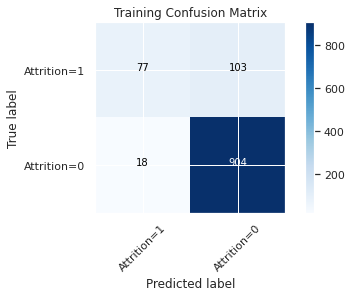

In [ ]:
# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')

In [ ]:
# Scoring the training model
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       922
           1       0.81      0.43      0.56       180

    accuracy                           0.89      1102
   macro avg       0.85      0.70      0.75      1102
weighted avg       0.88      0.89      0.88      1102



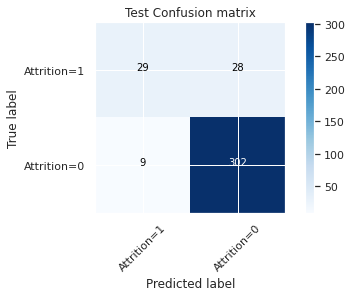

In [ ]:
# Compute confusion matrix for testing data
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Test Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       311
           1       0.76      0.51      0.61        57

    accuracy                           0.90       368
   macro avg       0.84      0.74      0.78       368
weighted avg       0.89      0.90      0.89       368



<function matplotlib.pyplot.show>

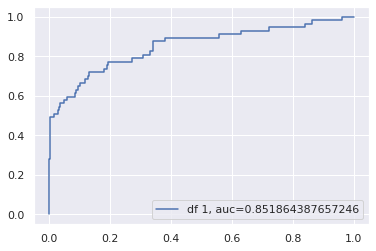

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="df 1, auc="+str(auc))
plt.legend(loc=4)
plt.show

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.292180
         Iterations: 35
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.339     
Dependent Variable:             y                          AIC:                        949.0096  
Date:                           2022-07-31 17:54           BIC:                        1187.1954 
No. Observations:               1470                       Log-Likelihood:             -429.50   
Df Model:                       44                         LL-Null:                    -649.29   
Df Residuals:                   1425                       LLR p-value:                1.1614e-66
Converged:                      0.0000                     Scale:                      1.0000    
No. Iterations:                 35.0000                                                          
----------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       922
           1       0.99      0.93      0.96       180

    accuracy                           0.99      1102
   macro avg       0.99      0.96      0.98      1102
weighted avg       0.99      0.99      0.99      1102


Confusion Matrix: 
 [[921   1]
 [ 13 167]]



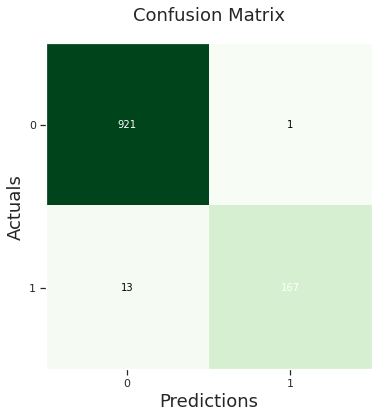

Average Accuracy: 	 0.8539
Accuracy SD: 		 0.0086
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       311
           1       0.89      0.14      0.24        57

    accuracy                           0.86       368
   macro avg       0.88      0.57      0.58       368
weighted avg       0.87      0.86      0.82       368


Confusion Matrix: 
 [[310   1]
 [ 49   8]]



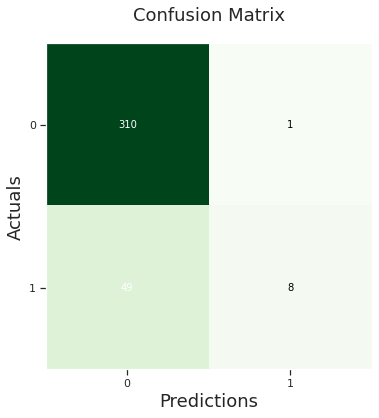

accuracy score: 0.8641

-----------------------------------------------------------


In [ ]:
# random forest model
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
  
rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
  
def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):
  
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
  
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))
        from mlxtend.plotting import plot_confusion_matrix
 
        fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(
            y_train, clf.predict(X_train)), figsize=(6, 6), cmap=plt.cm.Greens)
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        plt.show()

        res = cross_val_score(clf, X_train, y_train,
                              cv=10, scoring='accuracy')
  
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")
  
    elif train == False:
  
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
  
        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test))))
        from mlxtend.plotting import plot_confusion_matrix
        fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, clf.predict(X_test)), figsize=(6, 6), cmap=plt.cm.Greens)
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        plt.show()
  
        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
  
        print("-----------------------------------------------------------")
  
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=False)


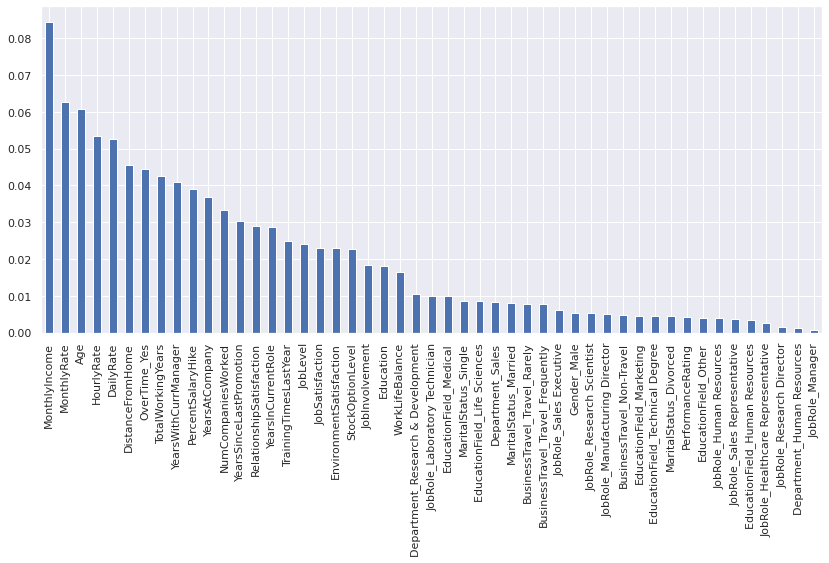

In [ ]:
pd.Series(rf.feature_importances_, 
         index = X.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (14,6));

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rf.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       311
           1       0.89      0.14      0.24        57

    accuracy                           0.86       368
   macro avg       0.88      0.57      0.58       368
weighted avg       0.87      0.86      0.82       368



The optimal number of neighbors is  7 


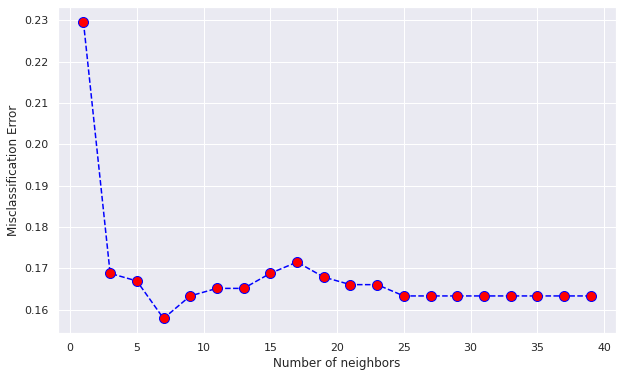

In [ ]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []
   
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]
   
# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)
   
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
 
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
                y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                y_train, clf.predict(X_train))))
 
        res = cross_val_score(clf, X_train, y_train,
                              cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(
                y_train, clf.predict(X_train))))
        print("----------------------------------------------------------")
                
    elif train == False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
                classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(
                confusion_matrix(y_test, clf.predict(X_test))))
        print("accuracy score: {0:.4f}\n".format(
                accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")
         
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       922
           1       0.83      0.19      0.32       180

    accuracy                           0.86      1102
   macro avg       0.85      0.59      0.62      1102
weighted avg       0.86      0.86      0.82      1102


Confusion Matrix: 
 [[915   7]
 [145  35]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0148
accuracy score: 0.8621

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       311
           1       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368


Confusion Matrix: 
 [[299  12]
 [ 55   2]]

accuracy score: 0.817

In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = knn.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       311
           1       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368



Confusion Matrix: 
 [[915   7]
 [145  35]]



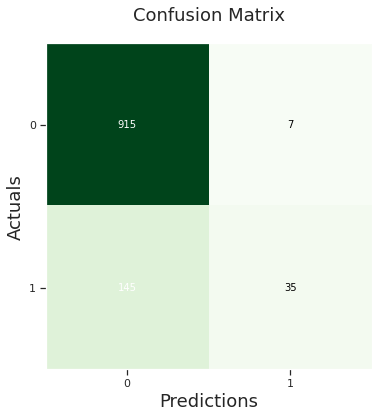

In [ ]:
print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, knn.predict(X_train))))
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(
            y_train, knn.predict(X_train)), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Confusion Matrix: 
 [[299  12]
 [ 55   2]]



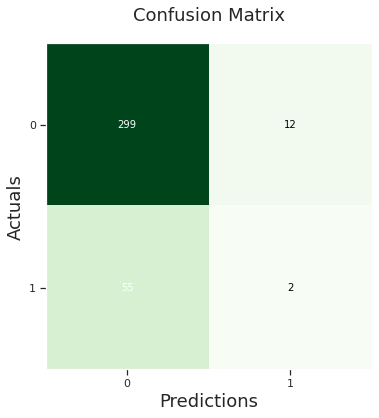

In [ ]:
        print("Confusion Matrix: \n {}\n".
        format(confusion_matrix(y_test, knn.predict(X_test))))
        from mlxtend.plotting import plot_confusion_matrix
        fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn.predict(X_test)), figsize=(6, 6), cmap=plt.cm.Greens)
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        plt.show()
  

Plotting of accuracy and F1 scores Graph of training an testing 

In [ ]:
# arrays of f1 scores and accuracy to plot graph
trainacc=np.array([0.98905,0.8620,0.8901])
mod=np.array(['Random forest','KNN','Logistic regression'])
testacc=np.array([ 0.86141,0.8179,0.8994])
f1train=np.array(['0.99','0.92','0.94'])
f1test=np.array(['0.93','0.90','0.94'])

Text(0.5, 1.0, 'Training accuracy')

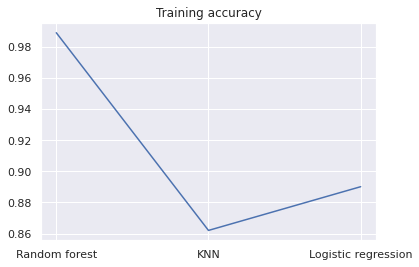

In [ ]:
#training accuracy graph
plt.plot(mod,trainacc)
plt.title("Training accuracy")

Text(0.5, 1.0, 'Testing accuracy')

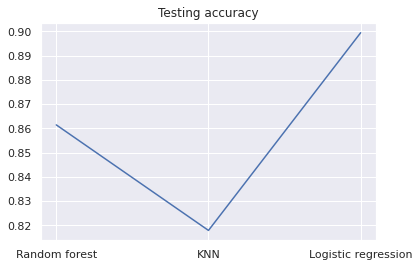

In [ ]:


#testing accuracy graph
plt.plot(mod,testacc)
plt.title("Testing accuracy")

Text(0.5, 1.0, 'Training f1 score')

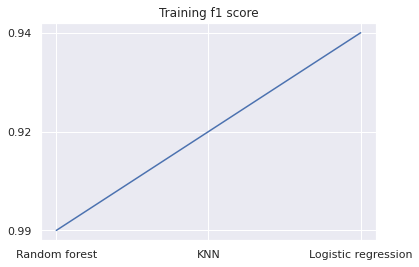

In [ ]:
# training f1 score graph
plt.plot(mod,f1train)
plt.title("Training f1 score")

Text(0.5, 1.0, 'Testing f1 score')

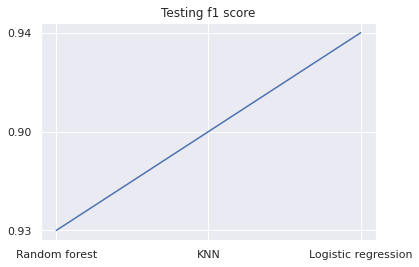

In [ ]:

# testing f1 score graph
plt.plot(mod,f1test)
plt.title("Testing f1 score")

The best model among the knn, logistic regression and random forest is:<br>
LOGISTIC REGRESSION<br>
This is proven by not only stastics in classification report but also by accuracy and f1 graph of confusion matrix. The accuracy here is more than 90%

Here we will test out the accuracy of logistic regression by testion out our 3 entries<br>
We will take first 3 entries and attrition value to them and then see if predictions are accurate or not

In [ ]:
# 1st entry of dataset
z=X.iloc[0].to_numpy()
print(z)

[   41  1102     1     2     2    94     3     2     4  5993 19479     8
    11     3     1     0     8     0     1     6     4     0     5     0
     0     1     0     0     1     0     1     0     0     0     0     0
     0     0     0     0     0     0     0     1     0     0     0     1
     1]


In [ ]:
# 2nd entry of dataset
b=X.iloc[1].to_numpy()
print(b)

[   49   279     8     1     3    61     2     2     2  5130 24907     1
    23     4     4     1    10     3     3    10     7     1     7     0
     1     0     0     1     0     0     1     0     0     0     0     1
     0     0     0     0     0     0     1     0     0     0     1     0
     0]


In [ ]:
# 3rd entry of dataset
a=X.iloc[2].to_numpy()
print(a)

[  37 1373    2    2    4   92    2    1    3 2090 2396    6   15    3
    2    0    7    3    3    0    0    0    0    0    0    1    0    1
    0    0    0    0    0    1    0    1    0    0    1    0    0    0
    0    0    0    0    0    1    1]


In [ ]:
#value of attrition for 1st 3 entries
print(y)
# these are (1,0,1)

[1 0 1 ... 0 0 0]


In [ ]:
z=z.reshape(1,49)
z_res = LR.predict(z)
print(z_res)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
b=b.reshape(1,49)
b_res = LR.predict(b)
print(b_res)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
a=a.reshape(1,49)
a_res = LR.predict(a)
print(a_res)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


as we can see, the values are predicted correctly